**Part 1**
**Problem 1**

Below is a screenshot of the lunar surface at coordinates 0.67416 ◦N, 23.47314 ◦E:

![Alt text](image.png)


The terrain at this location appears to be quite young and smooth compared to much of the lunar surface. This area is a part of a maria as is potholed by small, young impacts. The regolith here is also darker as it is derived from basaltic lava flows.

In [63]:
#Loading the Diviner data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#columns: c (channel\spectral band), cloctime (local time, lunar hr from midnight), csunzen (sza, incidence angle)
#         radiance (radiance, W m2 sr-1), tb (brightness temp, K)
col_widths = [22, 21, 21, 21, 21]
diviner_data = pd.read_fwf("astr5830-s25_diviner-example-data.txt", widths=col_widths)

print(diviner_data.columns)

Index(['c', 'cloctime', 'csunzen', 'radiance', 'tb'], dtype='object')


In [57]:
channels = diviner_data['c'].unique()
print("Channels:", channels)

t_bin_size = 1 #lunar hrs
t_min = np.floor(min(diviner_data['cloctime']))
t_max = np.ceil(max(diviner_data['cloctime']))
#Generating the time bins to divide the data up into
t_bins = np.arange(t_min, t_max+t_bin_size, t_bin_size)
tbin_labels = [f"{t_bins[i]:.1f}-{t_bins[i+1]:.1f}" for i in range(len(t_bins)-1)]

#generating mean and std dataframes to hold the data for each channel
means = pd.DataFrame(columns=['tbin'] + [f'c {c}' for c in channels])
means['tbin'] = tbin_labels
stds = pd.DataFrame(columns=['tbin'] + [f'c {c}' for c in channels])
stds['tbin'] = tbin_labels

means.set_index('tbin', inplace=True)
stds.set_index('tbin', inplace=True)

for channel in channels:
    # Filter data for this channel
    channel_data = diviner_data[diviner_data['c'] == channel].copy()
    
    # Create binning
    channel_data['tbin'] = pd.cut(channel_data['cloctime'], bins=t_bins)
    
    # Group by time bins
    grouped = channel_data.groupby('tbin')
    
    # Calculate mean brightness temperature for each bin
    mean_tb = grouped['tb'].mean()
    
    # Calculate standard deviation for each bin
    std_tb = grouped['tb'].std()

    for i, interval in enumerate(pd.cut(t_bins[:-1], bins=t_bins).categories):
        bin_label = tbin_labels[i]
        if interval in mean_tb.index:
            means.at[bin_label, f'c {channel}'] = mean_tb[interval]
            stds.at[bin_label, f'c {channel}'] = std_tb[interval]
        else:
            means.at[bin_label, f'c {channel}'] = np.nan
            stds.at[bin_label, f'c {channel}'] = np.nan



Channels: [6. 7. 8. 9.]


C:\Users\miro2306\AppData\Local\Temp\ipykernel_18536\3600761482.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = channel_data.groupby('tbin')
C:\Users\miro2306\AppData\Local\Temp\ipykernel_18536\3600761482.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = channel_data.groupby('tbin')
C:\Users\miro2306\AppData\Local\Temp\ipykernel_18536\3600761482.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warnin

In [59]:
print("Time-Binned Brightness Temperatures by Channel:")
print(means)

Time-Binned Brightness Temperatures by Channel:
                c 6.0       c 7.0       c 8.0       c 9.0
tbin                                                     
1.0-2.0    100.113536   98.984394    98.11875     97.8119
2.0-3.0           NaN         NaN         NaN         NaN
3.0-4.0           NaN         NaN         NaN         NaN
4.0-5.0     99.844118   96.553611   95.444433   96.830213
5.0-6.0           NaN         NaN         NaN         NaN
6.0-7.0    235.673519  221.317919  215.057496  209.692028
7.0-8.0    266.103896   256.74082  253.219103  245.835575
8.0-9.0    337.461774   333.06321   330.68666  321.357606
9.0-10.0          NaN         NaN         NaN         NaN
10.0-11.0  382.729141  378.467862  376.620383  365.760757
11.0-12.0         NaN         NaN         NaN         NaN
12.0-13.0  394.393874  389.751827  389.636139  380.324899
13.0-14.0  379.116235    374.9115  371.867488  363.301914
14.0-15.0         NaN         NaN         NaN         NaN
15.0-16.0  329.692273  3

In [60]:
print("\n\nTime-Binned Brightness Temperature Standard Deviations by Channel:")
print(stds)



Time-Binned Brightness Temperature Standard Deviations by Channel:
              c 6.0      c 7.0      c 8.0     c 9.0
tbin                                               
1.0-2.0    2.542577   0.919257   1.621789  2.306735
2.0-3.0         NaN        NaN        NaN       NaN
3.0-4.0         NaN        NaN        NaN       NaN
4.0-5.0    3.053144   2.021016   2.068536  3.242425
5.0-6.0         NaN        NaN        NaN       NaN
6.0-7.0    6.375283   8.203309   8.603917    8.1327
7.0-8.0    3.204627    3.52345   3.567518  3.518105
8.0-9.0    1.669669   2.186038   2.135649  2.727131
9.0-10.0        NaN        NaN        NaN       NaN
10.0-11.0  0.867978   1.043906    2.04427  3.888961
11.0-12.0       NaN        NaN        NaN       NaN
12.0-13.0  1.443647   1.277986   3.721063  7.532409
13.0-14.0  0.639536   0.620437    2.28781  2.826833
14.0-15.0       NaN        NaN        NaN       NaN
15.0-16.0  0.702461   0.743304   0.904795  3.040424
16.0-17.0  1.932974   1.657914   1.929987  2.27

By comparing the Figure 1 to the stds in the table above, Channels 6, 7 and 8 are all at or above the NEDT for the temperatures listed on the table. There's some bins which are close, but without the actual data table provided I'm just taking the standard deviations.


As for Channel 9, the standard deviations are below the NEDTs for the burgundy line shown in Figure 1. The next code box will be adjusting the stds to the NEDTs for the bins.

In [62]:
stds.at["1.0-2.0", 'c 9.0'] = 3
stds.at["4.0-5.0", 'c 9.0'] = 3
stds.at["6.0-7.0", 'c 9.0'] = 2.5
stds.at["7.0-8.0", 'c 9.0'] = 2.5
stds.at["8.0-9.0", 'c 9.0'] = 2.5
stds.at["10.0-11.0", 'c 9.0'] = 2.5
stds.at["12.0-13.0", 'c 9.0'] = 2.5
stds.at["13.0-14.0", 'c 9.0'] = 2.5
stds.at["15.0-16.0", 'c 9.0'] = 2.5
stds.at["16.0-17.0", 'c 9.0'] = 2.5
stds.at["17.0-18.0", 'c 9.0'] = 2.5
print(stds)

              c 6.0      c 7.0      c 8.0 c 9.0
tbin                                           
1.0-2.0    2.542577   0.919257   1.621789     3
2.0-3.0         NaN        NaN        NaN   NaN
3.0-4.0         NaN        NaN        NaN   NaN
4.0-5.0    3.053144   2.021016   2.068536     3
5.0-6.0         NaN        NaN        NaN   NaN
6.0-7.0    6.375283   8.203309   8.603917   2.5
7.0-8.0    3.204627    3.52345   3.567518   2.5
8.0-9.0    1.669669   2.186038   2.135649   2.5
9.0-10.0        NaN        NaN        NaN   NaN
10.0-11.0  0.867978   1.043906    2.04427   2.5
11.0-12.0       NaN        NaN        NaN   NaN
12.0-13.0  1.443647   1.277986   3.721063   2.5
13.0-14.0  0.639536   0.620437    2.28781   2.5
14.0-15.0       NaN        NaN        NaN   NaN
15.0-16.0  0.702461   0.743304   0.904795   2.5
16.0-17.0  1.932974   1.657914   1.929987   2.5
17.0-18.0  27.24298  25.929351  25.025209   2.5


Now, plotting the Brightness temperature vs local time for each available spectral channel

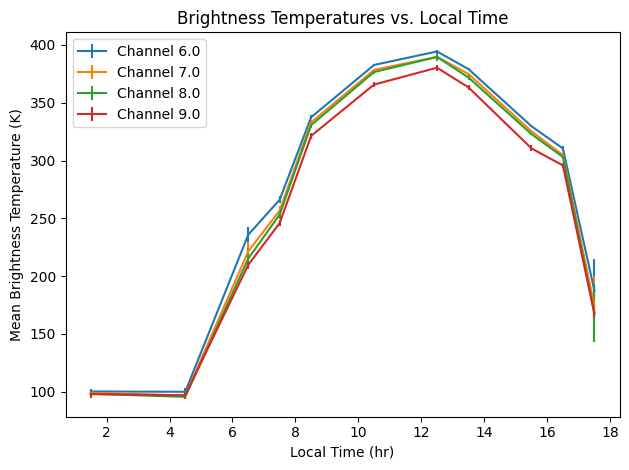

In [66]:
#Getting the bin centers
bin_centers = [(t_bins[i] + t_bins[i+1])/2 for i in range(len(t_bins)-1)]

plt.figure()

plt.title("Brightness Temperatures vs. Local Time")
plt.xlabel("Local Time (hr)")
plt.ylabel("Mean Brightness Temperature (K)")

for channel in channels:
    temp_tb = pd.to_numeric(means[f'c {channel}']).values
    temp_errs = pd.to_numeric(stds[f'c {channel}']).values
    nanmask = ~np.isnan(temp_tb)

    temp_tb_nonan = [temp_tb[i] for i in range(len(temp_tb)) if nanmask[i]]
    temp_times = [bin_centers[i] for i in range(len(bin_centers)) if nanmask[i]]
    temp_errs_nonan = [temp_errs[i] for i in range(len(temp_errs)) if nanmask[i]]
    plt.errorbar(temp_times, temp_tb_nonan, yerr=temp_errs_nonan, label=f"Channel {channel}")

plt.legend()
plt.tight_layout()
plt.show()

We take a typical lunar daytime temperature and nighttime temperatures to be 350K and 100K, as rough averages based on the diviner data above. Then, using Wien's dispacement law:

In [106]:
Wien_factor = 2898 # micron K
T_nighttime = 100 #K
T_daytime = 350 #K
lambda_max_daytime = Wien_factor / T_daytime
lambda_max_nighttime = Wien_factor / T_nighttime

print(f"The wavelength maximum using Wien's Law \nfor a typical lunar daytime temperature is {lambda_max_daytime} microns \nand for a typical lunar nighttime temperature is {lambda_max_nighttime} microns.")

The wavelength maximum using Wien's Law 
for a typical lunar daytime temperature is 8.28 microns 
and for a typical lunar nighttime temperature is 28.98 microns.


Based on these calculations, of the hannels provided, Channel 6 best represents the peak of the blackbody emission as it is closest to the peak, and channel 7 is best for nighttime measurements as it is close to the nighttime peak.

**Problem 2**

In [67]:
import math

For this problem, we'll use a surface emissivity of 0.95 which is about average for this geographic area of the moon. This value was sourced from Ren, et al. 2020.
For a temperature, we'll also use the daytime temperature on the moon from the previous problem.



Ren, H., Nie, J., Dong, J., Liu, R., Fa, W., Hu, L., & Fan, W. (2020). Lunar surface temperature and emissivity retrieval from diviner lunar radiometer experiment sensor. Earth and Space Science, 8, e2020EA001436. https://doi.org/10.1029/2020EA001436

In [118]:
k = 0.01 #W m-1 K-1; thermal conductivity
rho = 1500 #kg m-3; density
c_p = 800 #J kg-1 K-1; specific heat
sb_const = 5.67E-8 #J K-1; boltzmann constant

emissivity_reg = 0.95 #regolith emissivity from Ren, et al. 2020

kappa = k / (rho * c_p) #Thermal diffusivity

P = 29.5 #days, the lunar diurnal period
P_sec = P * 86400 #to seconds
omega = (2*math.pi) / P_sec

l_s = math.sqrt((kappa * P_sec) / math.pi)

gamma = math.sqrt(k * rho * c_p) #J m-2 s-1/2 K-1, thermal inertia

therm_param = (gamma / (emissivity_reg * sb_const * T_daytime**3)) * math.sqrt(omega/(2*math.pi))

print(f"The thermal diffusivity is {kappa:.2e} m2 s-1\nThe thermal skin depth is {l_s*(10**2):.2f} cm\nThe thermal parameter is {therm_param:.2e}")

The thermal diffusivity is 8.33e-09 m2 s-1
The thermal skin depth is 8.22 cm
The thermal parameter is 2.97e-02


Radiative equillibrium is a good approximation for the Moon based on the thermal parameter. This indicates that there is a large temperature cycle on the moon which is consistent with the observed daytime and nighttime temperatures of ~350K and ~100K. This is significantly smaller than the thermal parameter for a body such as the Earth, or other bodies with thick atmospheres which would have a larger thermal parameter and smaller temperature cycle.

**Problem 3**

In [117]:
import math

In [120]:
solar_const = 1361 #W m-2
A = 0.12 #albedo
emissivity = 0.95
sb_const = 5.67E-8 #W m-2 K-4

T_max = (((1-A)*solar_const) / (emissivity*sb_const))**(1/4)

T_mean = (((1-A)*solar_const) / (4*emissivity*sb_const))**(1/4)

T_min = (2*T_mean) - T_max

print(f"The maximum surface temperature is {T_max:.1f} K.\nThe mean surface temperature is {T_mean:.1f} K.\nThe minimum surface temperature is {T_min:.1f} K.")

The maximum surface temperature is 386.2 K.
The mean surface temperature is 273.1 K.
The minimum surface temperature is 159.9 K.


b.) Fitting a simple radiative equilibrium model to the daytime Diviner brightness temperature measurements... 

In [124]:
from scipy.optimize import curve_fit
import numpy as np

In [125]:
# Define the model function with albedo as the parameter to fit
def radiative_eq_model(incidence_angle, albedo):
    """
    Written by Claude. Is the model function for predicting the albedo
    """

    solar_const = 1361 #W m-2
    emissivity = 0.95
    sb_const = 5.67E-8 #W m-2 K-4

    # Convert incidence angle to μ = cos(θ)
    mu = np.cos(np.radians(incidence_angle))
    
    # Ensure no negative values (which would be nighttime)
    mu = np.maximum(mu, 0)
    
    # Calculate predicted temperature using radiative equilibrium equation
    temp = ((1 - albedo) * solar_const / (emissivity * sb_const) * mu) ** 0.25
    
    return temp

In [129]:
solar_const = 1361 #W m-2
emissivity = 0.95
sb_const = 5.67E-8 #W m-2 K-4

#getting channel 6 data
channel6 = diviner_data[diviner_data['c']==6.]
#getting daytime data (angle < 90)
c6_daytime = channel6[channel6['csunzen'] < 90]

#getting daytime incidence angles and temps
c6_dt_incidence_angles = c6_daytime['csunzen'].values
c6_dt_Ts = c6_daytime['tb'].values

#now fitting using the model above
popt, pcov = curve_fit(radiative_eq_model, c6_dt_incidence_angles, c6_dt_Ts, p0=0.12)

print(f"The predicted albedo is {popt[0]:.3f} +/- {np.sqrt(pcov[0,0]):.3f}")

The predicted albedo is 0.147 +/- 0.003


c.)

*Limitations*

- the model incorrectly predicts a temperature of 0K during the nighttime due to the solar flux dropping to 0, and does not account for other sources of heat like thermal inertia, geothermal effects, tidal effects.

- the model does not account for variability in the emissivity and albedo in the different compositions of rock we see on the Moon.

- The lunar surface is not spherical, it contains many rocks, craters, and topography which cast shadows and create differences in illumination of the surface which alter the temperature.

*improvements*

- The model could account for thermal inertia and other heating sources which would resolve nighttime heating effects.

- The model could use a topology map and ray tracing to more accurately model the illumination variations on the surface.

- we could also implement some roughness parameter that better captures the differences in rocky vs mostly regolith terrain

**BONUS**
**Problem 1**

In [25]:
import numpy as np
import math

In [26]:
def days_seconds_convert(time, type='days'):
    conversion_factor = 86400 #s/day
    if type=='days':
        return time * conversion_factor
    elif type=='seconds':
        return time / conversion_factor
    else:
        print("type incorrect, try again.")
        return None

a.) The assumptions inherent in Eq. 2 are that there is only heat flow in the z direction and heat is not propogating horizontally. We are also assuming that there is no reradiation of heat into the air above the surface and all of the heat absorbed into the surface is propogated downwards. We're also assuming that there is only lunar regolith, with a constant thermal diffusivity, and no lunar rocks, gradients, or other changes in the surface or subsurface composition. This also assumes that the received radiation is constant (even the better model in problem 3 assumes this) when there is variation in the solar insolation received by the moon depending on its location in its orbit and Earth's orbit. There is also no internal heat generated in this model.

In [27]:
kappa = 0.01 / (1500 * 800)

del_z, del_t = 0.5/20, days_seconds_convert(time=(29.5/100), type='days')
stability_crit = (kappa * del_t) / (del_z**2)
print(f"b.) The stability criterion for a spatial step size of {del_z:.2f} m, a time step size of {days_seconds_convert(time=del_t, type='seconds'):.2f} days,\n and thermal conductivity of {kappa:.2e} is {stability_crit:.2f}")

b.) The stability criterion for a spatial step size of 0.03 m, a time step size of 0.29 days,
 and thermal conductivity of 8.33e-09 is 0.34


In [28]:
kappa_rock = 1.0 / (3000 * 800)


del_z, del_t = 0.5/20, days_seconds_convert(time=(29.5/5000), type='days')
stability_crit = (kappa_rock * del_t) / (del_z**2)
print(f"c.) The stability criterion for a spatial step size of {del_z:.2f} m, a time step size of {days_seconds_convert(time=del_t, type='seconds'):.2f} days,\n and thermal conductivity of {kappa_rock:.2e} is {stability_crit:.2f}")

c.) The stability criterion for a spatial step size of 0.03 m, a time step size of 0.01 days,
 and thermal conductivity of 4.17e-07 is 0.34


**Bonus Problem 2**

In [47]:
import matplotlib.pyplot as plt

In [80]:
#The function to run the simulation, then in the following cell I'll write the code to run the simulation
def FTCS_numerical_model(max_depth, z_steps_number, lunar_period_s, sim_t_s, t_steps_number, kappa, T_mean, T_max, T_min):
    #set up spatial and temporal grids and temp array
    zs = np.linspace(0, max_depth, z_steps_number)
    times = np.linspace(0, sim_t_s, t_steps_number)
    Ts = np.empty((t_steps_number, z_steps_number))

    del_z = max_depth / (z_steps_number-1)
    del_t = sim_t_s / (t_steps_number-1)
    del_T = (T_max - T_min)

    #checking the stability criterion for the model
    stab_crit = (kappa * del_t) / (del_z**2)
    if stab_crit > (1/2):
        raise ValueError(f"The stability criterion must not exceed 0.5. Your stability criterion is {stab_crit:.2f}. Please reduce dt or increase dz to reduce stability criterion.")

    #setting init conditions for the temperature
    for j in range(z_steps_number):
        Ts[0,j] = T_mean

    #walking through the model for time
    for n in range(1, t_steps_number):
        #new time is just the iterator times dt since we start at t=0s.
        time = n * del_t

        for j in range(z_steps_number):
            #changing the surface condition with the sinusoidal periodicity
            if j == 0:
                Ts[n,j] = T_mean + (del_T * math.sin((2*math.pi*time) / lunar_period_s))
            #ensuring the bottom boundary condition is acheived
            elif j == z_steps_number-1:
                Ts[n,j] = T_mean
            #alterting the temperature between the surface and max_depth
            else:
                Ts[n,j] = Ts[n-1, j] + (stab_crit * (Ts[n-1,j+1] - (2*Ts[n-1,j]) + Ts[n-1,j-1]))

    return zs, times, Ts

def plotting_temp_profile2(zs, ts, Ts, t_steps_number, T_max, T_min, periods):
    period_length = t_steps_number // periods
    period_start = (periods-1) * period_length

    indices = np.linspace(period_start, t_steps_number-1, 6, endpoint=True, dtype=int)

    fig, axs = plt.subplots(2, 3, figsize=(15,10))
    axs = axs.flatten()

    for n, index in enumerate(indices):
        axs[n].plot(Ts[index, :], zs)
        axs[n].set_title(f"Time: {ts[index] / (3600*24):.2f} days")

        axs[n].set_xlabel("Temperature (K)")
        axs[n].set_ylabel("Depth (m)")
        axs[n].grid(True)
        axs[n].invert_yaxis()
        axs[n].set_xlim([0.75*T_min, 1.25*T_max])

    plt.tight_layout()
    plt.suptitle("Temperature vs Depth Evolution (Steady State)", y=1.03)
    plt.show()

10195200.0


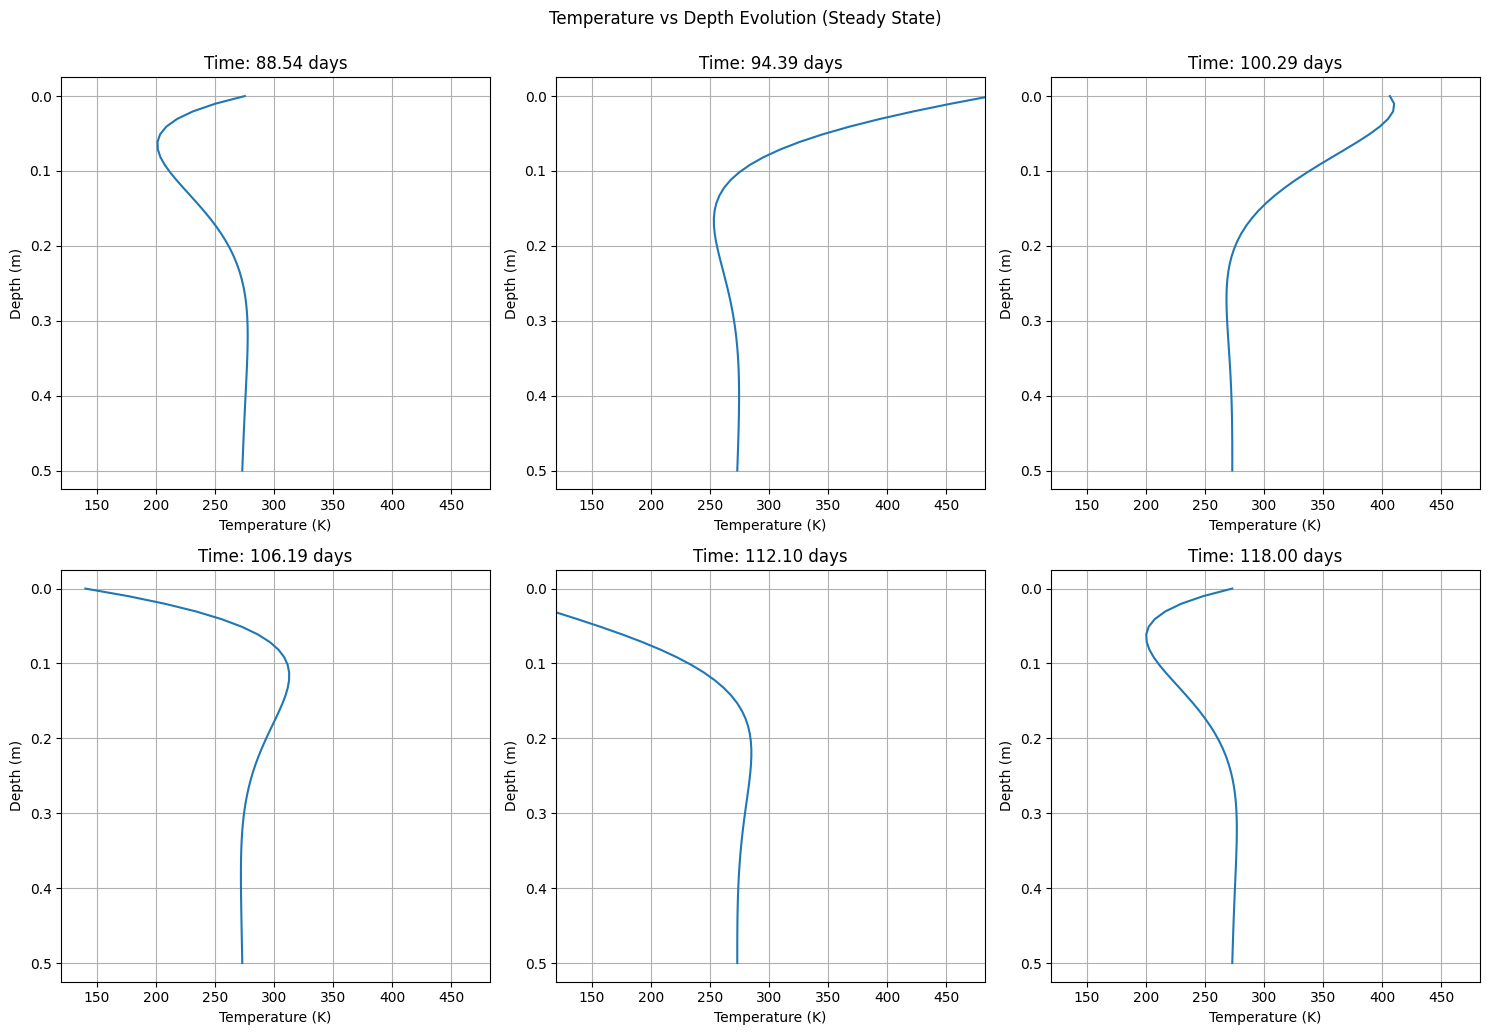

In [104]:
kappa = 0.01 / (1500 * 800) #thermal diffusivity. m2 s-1

max_depth = 0.5 #m
lunar_period_s = days_seconds_convert(time=29.5, type='days') #converting lunar period to seconds
periods = 4
simulation_time = 29.5 * periods #days
sim_t_s = days_seconds_convert(time=simulation_time, type='days')
print(sim_t_s)

z_steps_number = 50
t_steps_number = 2000

T_mean = 273.1 #K, the mean temp from problem 3a
T_max = 386.2 #K, the maximum temp on the lunar surface from problem 3a
T_min = 159.9 #K, the minimum temp on the lunar surface from problem 3a

z_arr, t_arr, T_arr = FTCS_numerical_model(max_depth, 
                                                z_steps_number, 
                                                lunar_period_s,
                                                sim_t_s, 
                                                t_steps_number,
                                                kappa,
                                                T_mean,
                                                T_max,
                                                T_min)

plotting_temp_profile2(z_arr, t_arr, T_arr, t_steps_number, T_max, T_min, periods)

Calculating the thermal skin depth.

In [117]:
def calc_tsd(zs, ts, Ts, periods, kappa, t_steps_number):
    period_length = t_steps_number // periods
    period_start = (periods-1) * period_length
    period_end = t_steps_number-1

    period_temps = Ts[period_start:period_end, :]

    Ts_maxes = np.max(period_temps, axis=0)
    Ts_mins = np.min(period_temps, axis=0)
    amplitudes = Ts_maxes - Ts_mins

    norm_amps = amplitudes / amplitudes[0]

    #finding where the normalized amplitude is closest to 1/e
    closest_index = np.absolute(norm_amps - (1/np.e)).argmin()

    skin_depth = zs[closest_index]

    print(f"Numerically estimated thermal skin depth: {skin_depth:.4f} m")

In [118]:
calc_tsd(z_arr, t_arr, T_arr, periods, kappa, t_steps_number)

Numerically estimated thermal skin depth: 0.0816 m


The thermal skin depth from problem 2a was 8.22cm compared with the model numerically estimated value of 8.16 cm. This is within 1% of the value we calculated in the previous problem.